<a href="https://colab.research.google.com/github/tsyganok-ks/usefull-things/blob/main/usefull_things.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
#Чтобы уменьшить размер - считываем, и пересохраняем в parquet
articles_file_path = '/content/drive/MyDrive/Colab Notebooks/HM Recommendation/articles.csv'
articles_data = pd.read_csv(articles_file_path)
articles_data.to_parquet('/content/drive/MyDrive/Colab Notebooks/HM Recommendation/articles.parquet')


In [ ]:
#чтобы артикулы не сьезжали, т.к. они начинаются с 0
dfi = pd.read_csv(articles_file_path, dtype={'article_id': str})

#чтобы сразу дату распарсить
df = pd.read_csv(articles_file_path, dtype={'article_id': str}, parse_dates=['t_dat'])

In [5]:
#читаем
articles = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/HM Recommendation/articles.parquet')

In [ ]:
#альтернативная идея - смержить сразу из всех таблиц в 1 и удалить лишнее - пересохранить таблицу и с ней работать
#merge
trans_arti = transactions.merge(articles,how='inner',on="article_id")
trans_arti.columns.tolist()


gc.collect()
#need to reduce few unimportance Features /columns which can be further used for feature eng. but as here cant due to lack of kaggle RAM
trans_arti.head(3)
drop_list = ["index_code","index_name","index_group_no","section_no","detail_desc","prod_name","detail_desc"
             ]
trans_arti.drop(drop_list,inplace=True,axis=1)
trans_arti.head(3)
print("The shape of the dataset", trans_arti.shape)

#drop the unimportant features
drop_col1 =["postal_code"]
df.drop(drop_col1,inplace=True,axis=1)
print("The shape of the dataset", df.shape)

In [ ]:
#информация о типах объектов в датасете
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
#переворачивает матрицу, и становится лучше видно параметры и значения
articles.head().T

,0,1,2,3,4
article_id,108775015,108775044,108775051,110065001,110065002
product_code,108775,108775,108775,110065,110065
prod_name,Strap top,Strap top,Strap top (1),OP T-shirt (Idro),OP T-shirt (Idro)
product_type_no,253,253,253,306,306
product_type_name,Vest top,Vest top,Vest top,Bra,Bra
product_group_name,Garment Upper body,Garment Upper body,Garment Upper body,Underwear,Underwear
graphical_appearance_no,1010016,1010016,1010017,1010016,1010016
graphical_appearance_name,Solid,Solid,Stripe,Solid,Solid
colour_group_code,9,10,11,9,10
colour_group_name,Black,White,Off White,Black,White


In [6]:
#describe() хорошо работает как для числовых, так и для текстовых столбцов
articles.index_name.describe()

count         105542
unique            10
top       Ladieswear
freq           26001
Name: index_name, dtype: object

In [ ]:
#показывает уникальные значения для каждого столбца
from termcolor import colored

for col in articles.columns:
    print(col + ":" + colored(str(len(articles[col].unique())), 'blue'))

article_id:105542
product_code:47224
prod_name:45875
product_type_no:132
product_type_name:131
product_group_name:19
graphical_appearance_no:30
graphical_appearance_name:30
colour_group_code:50
colour_group_name:50
perceived_colour_value_id:8
perceived_colour_value_name:8
perceived_colour_master_id:20
perceived_colour_master_name:20
department_no:299
department_name:250
index_code:10
index_name:10
index_group_no:5
index_group_name:5
section_no:57
section_name:56
garment_group_no:21
garment_group_name:21
detail_desc:43405


In [ ]:
#альтернативный вариант узнать состав датасета
articles.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [ ]:
#color_maps = {'turquoise': ['#1abc9c', '#e8f8f5', '#d1f2eb', '#a3e4d7', '#76d7c4', '#48c9b0', '#1abc9c', '#17a589', '#148f77', '#117864', '#0e6251']}
#CMAP = 'turquoise'
#корреляция цветная
articles.corr().style.background_gradient()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
article_id,1.000000,1.000000,-0.029674,0.007993,-0.064497,-0.048664,0.010208,-0.077247,-0.047474,-0.044521,-0.013408
product_code,1.000000,1.000000,-0.029674,0.007993,-0.064497,-0.048664,0.010208,-0.077247,-0.047474,-0.044521,-0.013408
product_type_no,-0.029674,-0.029674,1.000000,-0.001438,0.077929,-0.046910,-0.049135,-0.001921,0.067162,-0.118532,-0.461593
graphical_appearance_no,0.007993,0.007993,-0.001438,1.000000,0.016824,0.026956,0.019440,-0.000316,0.004883,0.011345,0.013072
colour_group_code,-0.064497,-0.064497,0.077929,0.016824,1.000000,0.066724,-0.177083,0.119798,0.035616,0.032955,-0.000316
perceived_colour_value_id,-0.048664,-0.048664,-0.046910,0.026956,0.066724,1.000000,0.027785,0.009986,0.032685,-0.004332,0.020732
perceived_colour_master_id,0.010208,0.010208,-0.049135,0.019440,-0.177083,0.027785,1.000000,-0.017224,-0.035996,-0.002461,-0.022573
department_no,-0.077247,-0.077247,-0.001921,-0.000316,0.119798,0.009986,-0.017224,1.000000,0.453340,0.349181,-0.053457
index_group_no,-0.047474,-0.047474,0.067162,0.004883,0.035616,0.032685,-0.035996,0.453340,1.000000,-0.077389,-0.144313
section_no,-0.044521,-0.044521,-0.118532,0.011345,0.032955,-0.004332,-0.002461,0.349181,-0.077389,1.000000,0.217788


In [ ]:
#цветовые схемы
color_maps = {'turquoise': ['#1abc9c', '#e8f8f5', '#d1f2eb', '#a3e4d7', '#76d7c4', '#48c9b0', '#1abc9c', '#17a589', '#148f77', '#117864', '#0e6251'], 
              'green': ['#16a085', '#e8f6f3', '#d0ece7', '#a2d9ce', '#73c6b6', '#45b39d', '#16a085', '#138d75', '#117a65', '#0e6655', '#0b5345'], 
              'emerald': ['#2ecc71', '#eafaf1', '#d5f5e3', '#abebc6', '#82e0aa', '#58d68d', '#2ecc71', '#28b463', '#239b56', '#1d8348', '#186a3b'], 
              'nephritis': ['#27ae60', '#e9f7ef', '#d4efdf', '#a9dfbf', '#7dcea0', '#52be80', '#27ae60', '#229954', '#1e8449', '#196f3d', '#145a32'], 
              'peter': ['#3498db', '#ebf5fb', '#d6eaf8', '#aed6f1', '#85c1e9', '#5dade2', '#3498db', '#2e86c1', '#2874a6', '#21618c', '#1b4f72'], 
              'belize': ['#2980b9', '#eaf2f8', '#d4e6f1', '#a9cce3', '#7fb3d5', '#5499c7', '#2980b9', '#2471a3', '#1f618d', '#1a5276', '#154360'], 
              'amethyst': ['#9b59b6', '#f5eef8', '#ebdef0', '#d7bde2', '#c39bd3', '#af7ac5', '#9b59b6', '#884ea0', '#76448a', '#633974', '#512e5f'], 
              'wisteria': ['#8e44ad', '#f4ecf7', '#e8daef', '#d2b4de', '#bb8fce', '#a569bd', '#8e44ad', '#7d3c98', '#6c3483', '#5b2c6f', '#4a235a'], 
              'wet': ['#34495e', '#ebedef', '#d6dbdf', '#aeb6bf', '#85929e', '#5d6d7e', '#34495e', '#2e4053', '#283747', '#212f3c', '#1b2631'], 
              'midnight': ['#2c3e50', '#eaecee', '#d5d8dc', '#abb2b9', '#808b96', '#566573', '#2c3e50', '#273746', '#212f3d', '#1c2833', '#17202a'], 
              'sunflower': ['#f1c40f', '#fef9e7', '#fcf3cf', '#f9e79f', '#f7dc6f', '#f4d03f', '#f1c40f', '#d4ac0d', '#b7950b', '#9a7d0a', '#7d6608'], 
              'orange': ['#f39c12', '#fef5e7', '#fdebd0', '#fad7a0', '#f8c471', '#f5b041', '#f39c12', '#d68910', '#b9770e', '#9c640c', '#7e5109'], 
              'carrot': ['#e67e22', '#fdf2e9', '#fae5d3', '#f5cba7', '#f0b27a', '#eb984e', '#e67e22', '#ca6f1e', '#af601a', '#935116', '#784212'], 
              'pumpkin': ['#d35400', '#fbeee6', '#f6ddcc', '#edbb99', '#e59866', '#dc7633', '#d35400', '#ba4a00', '#a04000', '#873600', '#6e2c00'], 
              'alizarin': ['#e74c3c', '#fdedec', '#fadbd8', '#f5b7b1', '#f1948a', '#ec7063', '#e74c3c', '#cb4335', '#b03a2e', '#943126', '#78281f'], 
              'pomegranate': ['#c0392b', '#f9ebea', '#f2d7d5', '#e6b0aa', '#d98880', '#cd6155', '#c0392b', '#a93226', '#922b21', '#7b241c', '#641e16'], 
              'clouds': ['#ecf0f1', '#fdfefe', '#fbfcfc', '#f7f9f9', '#f4f6f7', '#f0f3f4', '#ecf0f1', '#d0d3d4', '#b3b6b7', '#979a9a', '#7b7d7d'], 
              'silver': ['#bdc3c7', '#f8f9f9', '#f2f3f4', '#e5e7e9', '#d7dbdd', '#cacfd2', '#bdc3c7', '#a6acaf', '#909497', '#797d7f', '#626567'], 
              'concrete': ['#95a5a6', '#f4f6f6', '#eaeded', '#d5dbdb', '#bfc9ca', '#aab7b8', '#95a5a6', '#839192', '#717d7e', '#5f6a6a', '#4d5656'], 
              'asbestos': ['#7f8c8d', '#f2f4f4', '#e5e8e8', '#ccd1d1', '#b2babb', '#99a3a4', '#7f8c8d', '#707b7c', '#616a6b', '#515a5a', '#424949']}
color_maps = {i: color_maps[i] for i in color_maps if i not in ['clouds', 'silver', 'concrete', 'asbestos', 'wet asphalt', 'midnight blue', 'wet']}

#для графика рисовки можно так задать
#random.choice(list(color_maps.values())

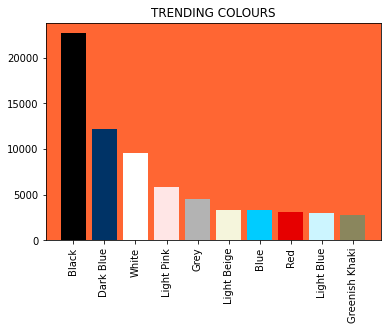

In [ ]:
#основные цвета и схема подсчета через counter
from collections import Counter
import matplotlib.pyplot as plt

product_count = Counter(list(articles['colour_group_name']))
prod_count=dict(product_count.most_common(10))
X=list(prod_count.keys())
y=prod_count.values()
colurs=['#000000','#003366','#ffffff','#ffe6e6','#b3b3b3','#f5f5dc','#00ccff','#e60000','#ccf5ff','#8A865D']
ax=plt.axes()
ax.set_facecolor('#ff6633')
plt.bar(X,y,color=colurs)
plt.xticks(X, X, rotation='vertical')
plt.title("TRENDING COLOURS")
plt.show()

In [ ]:
import plotly.express as px

transactions = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/HM Recommendation/transactions.parquet')

yearly_sales = transactions.groupby(['t_dat'])['price'].sum().reset_index()
fig = px.line(yearly_sales, x='t_dat', y='price', title='Time Series with Yearly Sales')

fig.show()

In [ ]:
#resize изображений на 256*256
import cv2 
import os
import shutil

TARGET_SHAPE = (256,256)
INTERPOLATION = cv2.INTER_AREA
INPUT_DIR = "../input/h-and-m-personalized-fashion-recommendations/images/"
TARGET_DIR = "images_256_256/"

folders = os.listdir(INPUT_DIR)
for folder in folders:
    images = os.listdir(str(INPUT_DIR + folder))
    os.makedirs(str(TARGET_DIR  + folder) , exist_ok=True)
    for image in images:
        loaded_image = cv2.imread(str(INPUT_DIR + folder + "/" +  image))
        resized_image = cv2.resize(loaded_image, TARGET_SHAPE , interpolation =INTERPOLATION)
        cv2.imwrite(str(TARGET_DIR+ folder + "/" +  image) , resized_image)
    print("FOLDER DONE - ", folder)
print("!CHECK! RESIZED IMAGE SHAPE - ",resized_image.shape)

source = [
    "../input/h-and-m-personalized-fashion-recommendations/articles.csv",
    "../input/h-and-m-personalized-fashion-recommendations/customers.csv",
    "../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv",
    "../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv"
]
destination = "./"
for files in source:
    shutil.copy2(files,destination)
print("DONE!!! ")

In [ ]:
#заполнение пропусков - Nan, при помощи XGBoost
#Impute Method 1 with Xgboost
def impute_missing_wxgboost(df,conservative = False, n_feats = 10,            
           fix_string_nans = True, verbose = True,                
           multiprocessing_load = 3, fill_nans_in_pure_text = True,                    
           drop_empty_cols = True, drop_nan_cols_with_constant = False,                        
           ):
    
    from verstack import NaNImputer
    #verstack 2.0.1
    imputer = NaNImputer(conservative = conservative, n_feats = n_feats,            
           fix_string_nans = fix_string_nans, verbose = verbose,                
           multiprocessing_load = multiprocessing_load, fill_nans_in_pure_text = fill_nans_in_pure_text,                    
           drop_empty_cols = drop_empty_cols, drop_nan_cols_with_constant = drop_nan_cols_with_constant,                      
           )
    
    df_imputed = imputer.impute(df)
    
    return df_imputed

df1 = impute_missing_wxgboost(df)
df1.dtypes

In [ ]:
#уникальные значения между 2х листов = с
c = list(set(l) & set(dummy_list_1w[:(12-len(l))]))